In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import sys
sys.path.append('/anaconda/lib/python2.7/site-packages')
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from statsmodels.stats.api import anova_lm

In [10]:
twomonthssalary = pd.read_csv('two_months_salary.csv')

In [183]:
print len(twomonthssalary)

425


In [187]:
pd.isnull(twomonthssalary).sum()

carat      0
color      0
clarity    0
cut        0
channel    0
store      0
price      0
ytrans     0
dtype: int64

Variable | Description | Type of Variable
---| ---| ---
Carat| weight of diamond in carats (1 carat = 200 milligrams) | continuous
Color | color grade of diamond, D = 1, E = 2, F = 3, G = 4, H = 5, I = 6, J = 7, K = 8, L = 9, M = 10 | ordinal 
Clarity | purity of diamond, FL = 1, IF = 2, VVS1 = 3, VVS2 = 4, VS1 = 5, VS2 = 6, SI = 7, SI2 = 8, I1 = 9, I2 = 10, I3 = 11 | ordinal
Cut | Ideal = 1, Not Ideal = 0 | ordinal
Channel | jeweler type, Mall = 0, Independent= 1, Internet= 2 | nominal 
Store | Goodman's = 1, Chalmer's = 2, Fred Meyer's = 3, R. Holland = 4, Ausman's = 5, University = 6, Kay's = 7, Zales = 8, Danford = 9, Blue Nile = 10, Ashford's = 11, Riddle's = 12| nominal 
Price | price of diamond | continuous

In [11]:
twomonthssalary.describe()

,carat,color,clarity,cut,channel,store,price
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,1.040685,4.312941,6.134118,0.362353,1.609412,9.240000,6355.992941
std,0.421967,1.864122,1.604354,0.481247,0.718952,2.597858,4404.237376
min,0.200000,1.000000,2.000000,0.000000,0.000000,1.000000,497.000000
25%,0.720000,3.000000,5.000000,0.000000,1.000000,10.000000,3430.000000
50%,1.020000,4.000000,6.000000,0.000000,2.000000,10.000000,5476.000000
75%,1.210000,6.000000,7.000000,1.000000,2.000000,11.000000,7792.000000
max,2.480000,9.000000,10.000000,1.000000,2.000000,12.000000,27575.000000


In [12]:
twomonthssalary.corr()

,carat,color,clarity,cut,channel,store,price
carat,1.000000,0.170684,-0.000742,-0.201244,0.204716,0.091432,0.879631
color,0.170684,1.000000,0.014323,-0.129329,-0.239422,-0.047202,-0.077977
clarity,-0.000742,0.014323,1.000000,-0.118076,-0.439076,-0.248803,-0.141049
cut,-0.201244,-0.129329,-0.118076,1.000000,0.191891,0.051010,-0.100870
channel,0.204716,-0.239422,-0.439076,0.191891,1.000000,0.599606,0.152715
store,0.091432,-0.047202,-0.248803,0.051010,0.599606,1.000000,0.044845
price,0.879631,-0.077977,-0.141049,-0.100870,0.152715,0.044845,1.000000


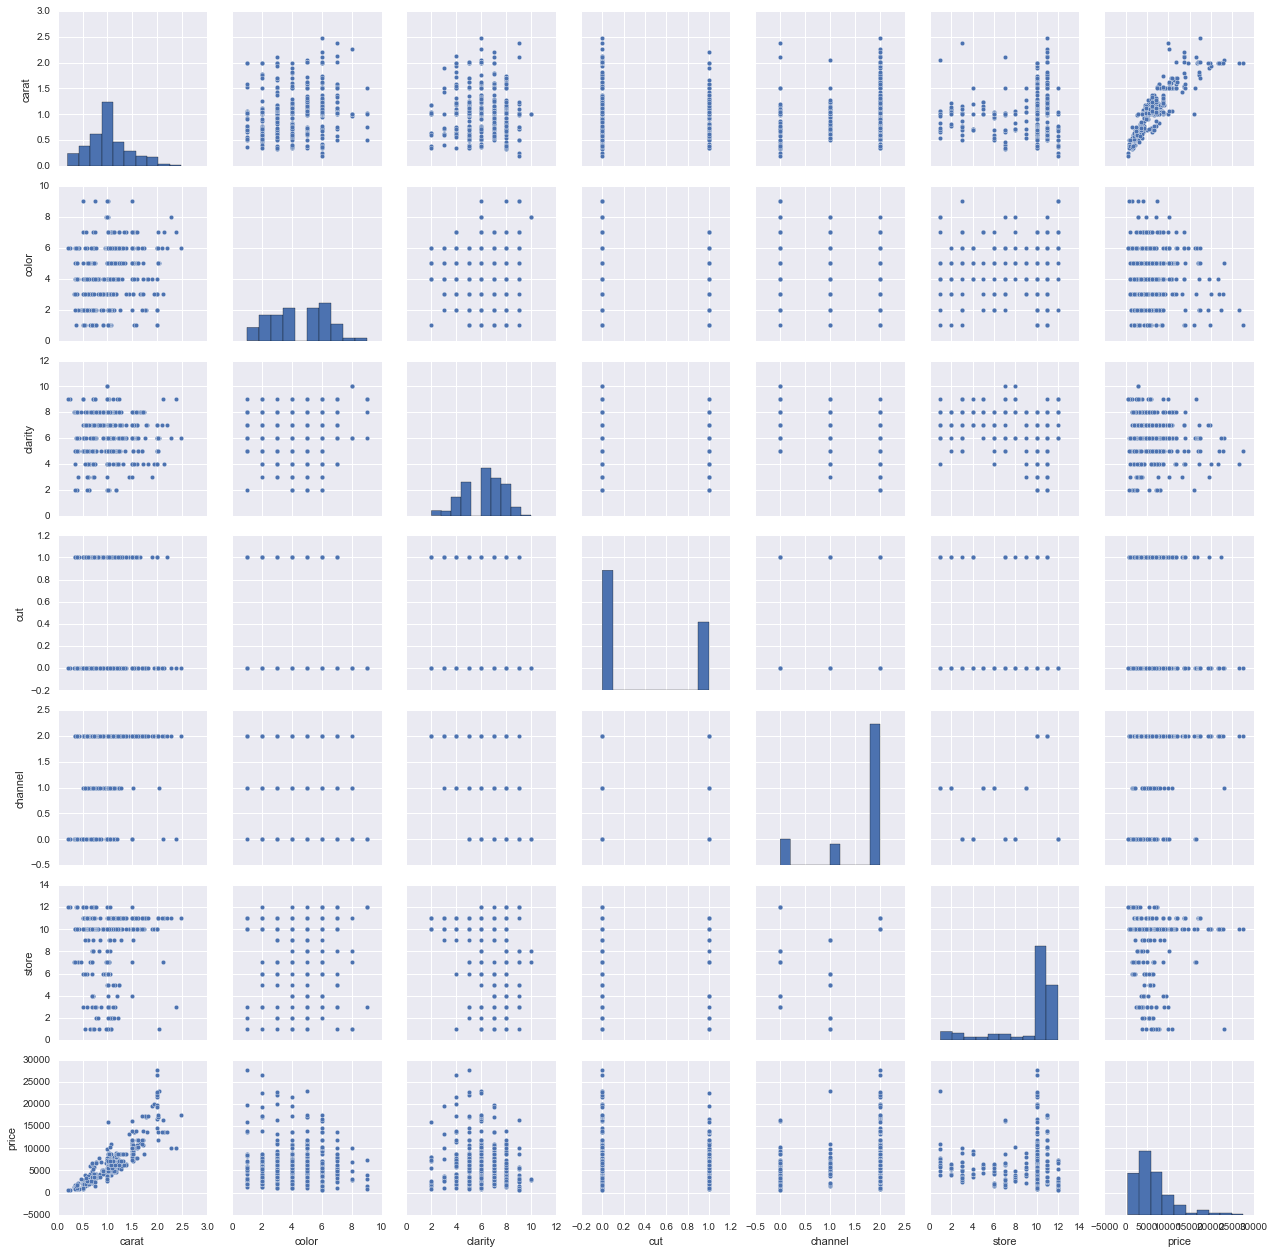

In [25]:
sns.pairplot(twomonthssalary)

Price is the response variable. Carat seems to have a positive linear relationship and color a negative linear relationship from their scatterplots with price. Color and Clarity start out best then worst, so it's really the inverse relationship. I think because there are fewer high-clarity diamonds, or they may be smaller, but generally smaller trend. look more detaile at carat, color, and clarity. Channel also appears to have a positive linear relationship. 

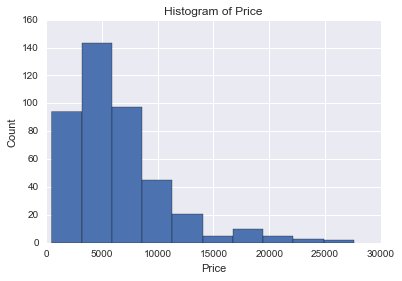

In [192]:
plt.hist(twomonthssalary['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Price')

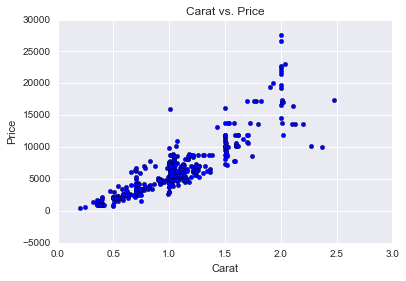

In [130]:
plt.scatter(twomonthssalary['carat'], twomonthssalary['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs. Price')

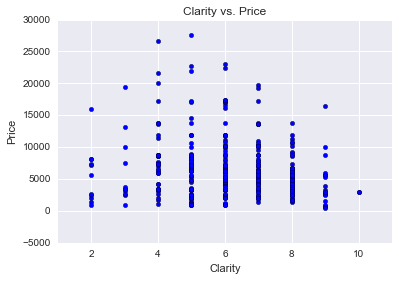

In [132]:
plt.scatter(twomonthssalary['clarity'], twomonthssalary['price'])
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.title('Clarity vs. Price')

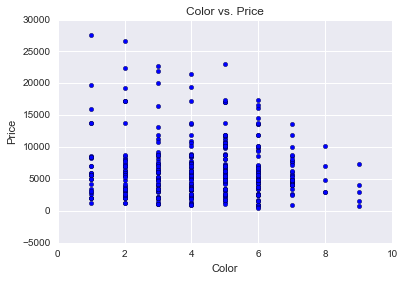

In [197]:
plt.scatter(twomonthssalary['color'], twomonthssalary['price'])
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Color vs. Price')

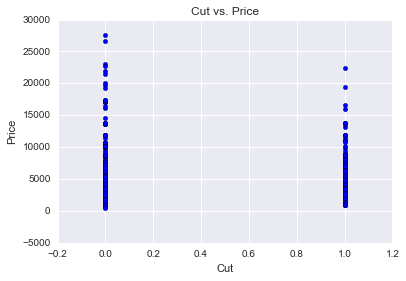

In [198]:
plt.scatter(twomonthssalary['cut'], twomonthssalary['price'])
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Cut vs. Price')

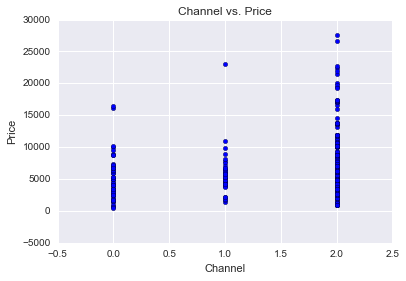

In [137]:
plt.scatter(twomonthssalary['channel'], twomonthssalary['price'])
plt.xlabel('Channel')
plt.ylabel('Price')
plt.title('Channel vs. Price')

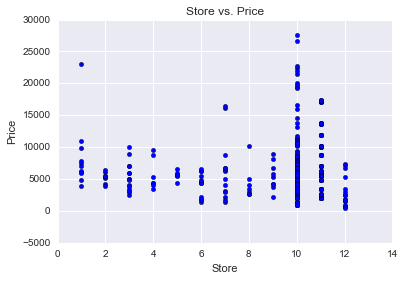

In [138]:
plt.scatter(twomonthssalary['store'], twomonthssalary['price'])
plt.xlabel('Store')
plt.ylabel('Price')
plt.title('Store vs. Price')

(array([  11.,   11.,   42.,   76.,    0.,  108.,   84.,   71.,   20.,    2.]),
 array([  2. ,   2.8,   3.6,   4.4,   5.2,   6. ,   6.8,   7.6,   8.4,
          9.2,  10. ]),
 <a list of 10 Patch objects>)

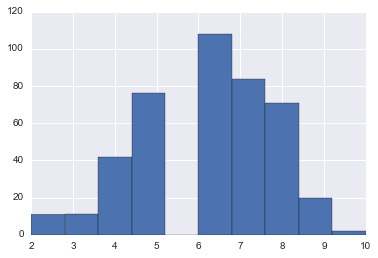

In [21]:
plt.hist(twomonthssalary['clarity'])

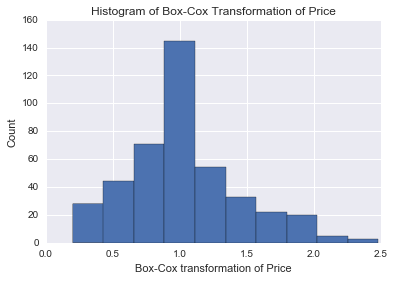

In [190]:
plt.hist(twomonthssalary['carat'])


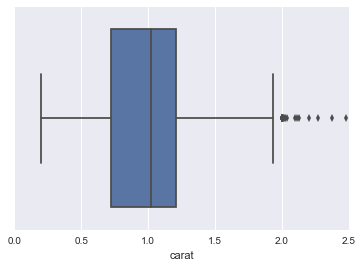

In [22]:
sns.boxplot(twomonthssalary['carat'])

In [200]:
X = twomonthssalary['carat']
y = twomonthssalary['price']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm1 = smf.ols(formula='y ~ X', data=twomonthssalary).fit()
#print the full summary
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1447.
Date:                Sun, 16 Jul 2017   Prob (F-statistic):          1.38e-138
Time:                        19:19:32   Log-Likelihood:                -3852.6
No. Observations:                 425   AIC:                             7709.
Df Residuals:                     423   BIC:                             7717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3198.6102    271.028    -11.802      0.000     -3731.340 -2665.880
X           9181.0739    241.388     38.035      0.000      8706.605  9655.543
==============================================================================
Omnibus:                      160.535   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1043.285
Skew:                           1.467   Prob(JB):                    2.84e-227
Kurtosis:                      10.092   Cond. No.                         5.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

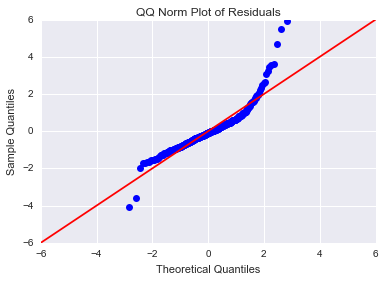

In [201]:
#qqnorm plot
fig = sm.qqplot(lm1.resid, fit=True, line='45')
plt.show
plt.title('QQ Norm Plot of Residuals')

In [148]:
from scipy import stats
twomonthssalary['ytrans'] = stats.boxcox(twomonthssalary.price)[0]
twomonthssalary.head(2)

,carat,color,clarity,cut,channel,store,price,ytrans
0,0.826,4,7,1,1,1,7775,23.331564
1,0.996,5,6,1,1,1,9850,24.634045


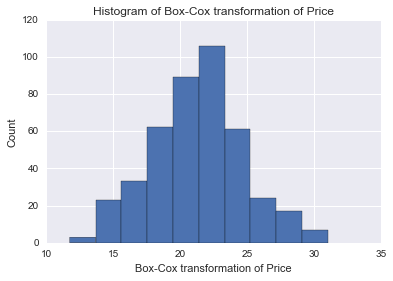

In [191]:
plt.hist(twomonthssalary['ytrans'])
plt.xlabel('Box-Cox transformation of Price')
plt.ylabel('Count')
plt.title('Histogram of Box-Cox transformation of Price')

In [154]:
#color dummy variables
#clarity dummy variables
dummy_color = pd.get_dummies(twomonthssalary['color'], prefix="Color")
dummy_clarity = pd.get_dummies(twomonthssalary['clarity'], prefix="Clarity")
dummy_cut = pd.get_dummies(twomonthssalary['cut'], prefix="Cut")
dummy_channel = pd.get_dummies(twomonthssalary['channel'], prefix="Channel")
dummy_store = pd.get_dummies(twomonthssalary['store'], prefix="Store")

In [156]:
#combine dummy variables w/dataframe
df1 = twomonthssalary[['carat', 'price', 'ytrans']]
df2 = pd.concat([df1, dummy_color, dummy_clarity, dummy_cut, dummy_channel, dummy_store], axis=1)

In [164]:
#choose dummy classes with most data points to be base category: color 6 and clarity 6
print twomonthssalary.groupby('color').count()
print twomonthssalary.groupby('channel').count()

       carat  clarity  cut  channel  store  price  ytrans
color                                                    
1         30       30   30       30     30     30      30
2         59       59   59       59     59     59      59
3         58       58   58       58     58     58      58
4         73       73   73       73     73     73      73
5         73       73   73       73     73     73      73
6         85       85   85       85     85     85      85
7         37       37   37       37     37     37      37
8          5        5    5        5      5      5       5
9          5        5    5        5      5      5       5
         carat  color  clarity  cut  store  price  ytrans
channel                                                  
0           59     59       59   59     59     59      59
1           48     48       48   48     48     48      48
2          318    318      318  318    318    318     318


In [175]:
#carat, color, and channel  vs price
#removed color  6
X = df2[['carat', 'Color_1', 'Color_2', 'Color_3', 'Color_4', 'Color_5', 'Color_7', 'Color_8', 'Color_9', 'Channel_0', 'Channel_1']]
y = df2['price']

## fit a OLS model with intercept
X = sm.add_constant(X)
lm2 = smf.OLS(y, X).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sun, 16 Jul 2017   Prob (F-statistic):          4.08e-159
Time:                        16:21:59   Log-Likelihood:                -3773.2
No. Observations:                 425   AIC:                             7570.
Df Residuals:                     413   BIC:                             7619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -5229.6829    319.945    -16.346      0.000     -5858.606 -4600.759
carat       9914.0000    215.113     46.087      0.000      9491.147  1.03e+04
Color_1     2818.2499    378.142      7.453      0.000      2074.926  3561.574
Color_2     2301.8967    303.556      7.583      0.000      1705.190  2898.604
Color_3     1599.6617    303.406      5.272      0.000      1003.248  2196.075
Color_4     1630.4905    284.967      5.722      0.000      1070.324  2190.657
Color_5     1052.1268    282.443      3.725      0.000       496.922  1607.331
Color_7    -1337.3677    348.316     -3.840      0.000     -2022.061  -652.674
Color_8    -2303.9122    820.443     -2.808      0.005     -3916.677  -691.147
Color_9    -2272.1593    837.317     -2.714      0.007     -3918.093  -626.225
Channel_0   1393.0861    272.619      5.110      0.000       857.193  1928.979
Channel_1    421.6514    277.957      1.517      0.130      -124.736   968.038
==============================================================================
Omnibus:                      160.091   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1210.653
Skew:                           1.409   Prob(JB):                    1.29e-263
Kurtosis:                      10.774   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

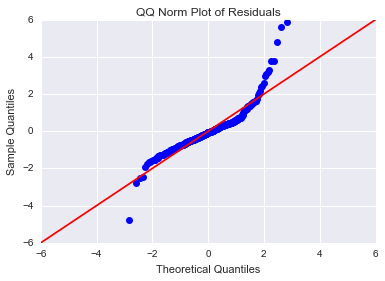

In [176]:
#qqnorm plot
fig = sm.qqplot(lm2.resid, fit=True, line='45')
plt.show
plt.title('QQ Norm Plot of Residuals')

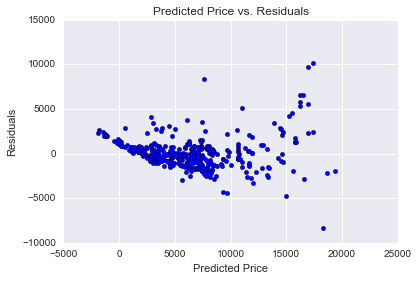

In [177]:
#fitted values vs residuals
plt.scatter(lm2.fittedvalues, lm2.resid)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Predicted Price vs. Residuals')

In [208]:
#carat, color, and channel  vs ytrans
#removed color and clarity 6
X = df2[['carat', 'Color_1', 'Color_2', 'Color_3', 'Color_4', 'Color_5', 'Color_7', 'Color_8', 'Color_9', 'Channel_0', 'Channel_1']]
y = df2['ytrans']

## fit a OLS model with intercept
X = sm.add_constant(X)
lm6 = smf.OLS(y, X).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ytrans   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     272.6
Date:                Sun, 16 Jul 2017   Prob (F-statistic):          1.29e-181
Time:                        20:54:19   Log-Likelihood:                -678.32
No. Observations:                 425   AIC:                             1381.
Df Residuals:                     413   BIC:                             1429.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         12.1668      0.220     55.297      0.000        11.734    12.599
carat          7.8708      0.148     53.206      0.000         7.580     8.162
Color_1        2.0475      0.260      7.874      0.000         1.536     2.559
Color_2        1.6102      0.209      7.713      0.000         1.200     2.021
Color_3        1.1497      0.209      5.510      0.000         0.740     1.560
Color_4        1.1312      0.196      5.773      0.000         0.746     1.516
Color_5        0.8789      0.194      4.525      0.000         0.497     1.261
Color_7       -0.6451      0.240     -2.693      0.007        -1.116    -0.174
Color_8       -1.5981      0.564     -2.833      0.005        -2.707    -0.489
Color_9       -2.4868      0.576     -4.319      0.000        -3.619    -1.355
Channel_0      1.0031      0.187      5.350      0.000         0.635     1.372
Channel_1      0.7827      0.191      4.095      0.000         0.407     1.158
==============================================================================
Omnibus:                       35.346   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.196
Skew:                          -0.161   Prob(JB):                     1.79e-32
Kurtosis:                       5.855   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

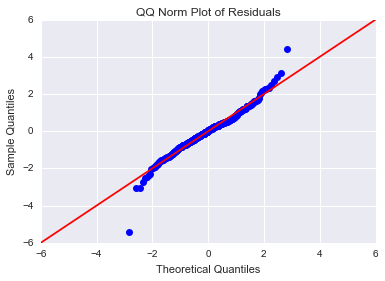

In [167]:
#qqnorm plot
fig = sm.qqplot(lm6.resid, fit=True, line='45')
plt.show
plt.title('QQ Norm Plot of Residuals')

In [1]:
#fitted values vs residuals
plt.scatter(lm6.fittedvalues, lm6.resid)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Predicted Price vs. Residuals')

NameError: name 'plt' is not defined

In [212]:
#lm5 = smf.ols(formula='ytrans ~ color + channel + carat', data=twomonthssalary).fit()
X = twomonthssalary[['color', 'channel', 'carat']]
#X = sm.add_constant(X)
y = twomonthssalary['ytrans']

lm5 = smf.ols(formula = 'y ~ X', data=twomonthssalary)
table2 = sm.stats.anova_lm(lm6, typ=1) 
#print table2

AttributeError: 'DataFrame' object has no attribute 'design_info'

In [219]:
mod = smf.ols('ytrans ~ color + channel + carat',
                data=twomonthssalary).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print aov_table

             df       sum_sq      mean_sq            F         PR(>F)
color       1.0    10.899497    10.899497     7.138324   7.838121e-03
channel     1.0   102.259708   102.259708    66.972172   3.302039e-15
carat       1.0  4247.141232  4247.141232  2781.547842  1.332117e-187
Residual  421.0   642.824269     1.526899          NaN            NaN


In [161]:
list(df2.columns.values)

['carat',
 'price',
 'ytrans',
 'Color_1',
 'Color_2',
 'Color_3',
 'Color_4',
 'Color_5',
 'Color_6',
 'Color_7',
 'Color_8',
 'Color_9',
 'Clarity_2',
 'Clarity_3',
 'Clarity_4',
 'Clarity_5',
 'Clarity_6',
 'Clarity_7',
 'Clarity_8',
 'Clarity_9',
 'Clarity_10',
 'Cut_0',
 'Cut_1',
 'Channel_0',
 'Channel_1',
 'Channel_2',
 'Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12']